In [1]:
import os
os.chdir('/kaggle/input/functions')
from functions import *

In [2]:
!ls

functions.py


In [3]:
import pandas as pd
import numpy as np
import pickle
from functions import *
os.chdir('/kaggle/input/mydatasets2')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from copy import deepcopy
import xgboost as xg
from tqdm import tqdm

In [4]:
def models_predict(model_list, x_values):
  preds = np.zeros((x_values.get_data().shape[0], ))
  for mdl in  models_list:
    preds += mdl.predict(x_values)
  return preds/len(model_list)

In [5]:
help(preprocess_data_equal_division)

Help on function preprocess_data_equal_division in module functions:

preprocess_data_equal_division(file_path, split=True, time_steps=10, num_stocks=30, le=False, only_close=False, equal_split=True, min_change=1e-05)



In [6]:
num_stocks = 500
models_dict = {}
train_metrics_dict = {}
valid_metrics_dict = {}
test_metrics_dict = {}
for k in tqdm(range(10, 101, 10)):    
    time_steps = k
    print("Time_steps =", time_steps)
    x_train, x_valid, y_train, y_valid = preprocess_data_equal_division('training_set1.pkl', time_steps=time_steps,split = True, num_stocks = num_stocks, le = True,
                                        only_close=False,
                                        equal_split=False)
    print(x_train.shape, x_valid.shape)
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_valid = x_valid.reshape((x_valid.shape[0], -1))
    xg_train = xg.DMatrix(x_train, y_train)
    xg_valid = xg.DMatrix(x_valid)
    params = {'objective':'multi:softmax', 'eval_metric':'merror', 'num_class':'3',
              'device':'cuda',
              'eta':'0.1', 'max_depth':'5'}
    models_list = []
    for i in range(1):
      mdl1 = xg.train(params, xg_train, num_boost_round=int(time_steps*1.5))
      models_list.append(mdl1)
    models_dict[time_steps] = deepcopy(models_list[0])
    train_preds = models_predict(models_list, xg_train)
    train_metrics_dict[time_steps] = metric_calculations(train_preds, y_train, set_ = "Train Set")
    valid_preds = models_predict(models_list, xg_valid)
    valid_metrics_dict[time_steps] = metric_calculations(valid_preds, y_valid, set_ = "Validation Set")
    pickle_file_path = 'training_set11.pkl'
    x_test, y_test = preprocess_data_equal_division(pickle_file_path, time_steps=time_steps, split = False, num_stocks = num_stocks, le = True,
                                        only_close=False,
                                        equal_split=False)
    x_test = x_test.reshape((x_test.shape[0], -1))
    xg_test = xg.DMatrix(x_test)
    test_preds = models_predict(models_list, xg_test)
    test_metrics_dict[time_steps] = metric_calculations(test_preds, y_test, set_ = "Test Set")

  0%|          | 0/10 [00:00<?, ?it/s]

Time_steps = 10
(876800, 10, 4) (219200, 10, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:58:22] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 50.393590328467155,
  Precision: 50.44358298444204,
  Recall: 55.54662599034697,
  Specificity: 45.22076972300942,
  F1score: 52.87225800859235
For Validation Set
  Accuracy: 49.95939781021898,
  Precision: 49.94799856892062,
  Recall: 54.79171990799898,
  Specificity: 45.13024918822285,
  F1score: 52.25785952740552


 10%|█         | 1/10 [11:11<1:40:46, 671.80s/it]

For Test Set
  Accuracy: 49.26962457337884,
  Precision: 48.979908670910135,
  Recall: 41.7492208497415,
  Specificity: 56.749004996573646,
  F1score: 45.076438738157286
Time_steps = 20
(872800, 20, 4) (218200, 20, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:09:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 50.931141154903756,
  Precision: 51.0230336363185,
  Recall: 53.998382645881684,
  Specificity: 47.84483551240323,
  F1score: 52.4685610151038
For Validation Set
  Accuracy: 50.1429880843263,
  Precision: 50.31564727175108,
  Recall: 53.05386378370481,
  Specificity: 47.20977521783535,
  F1score: 51.64848840413523


 20%|██        | 2/10 [22:36<1:30:37, 679.64s/it]

For Test Set
  Accuracy: 49.2439585730725,
  Precision: 49.07243816254417,
  Recall: 41.44510507384875,
  Specificity: 57.034416447758865,
  F1score: 44.93741838673514
Time_steps = 30
(868800, 30, 4) (217200, 30, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:20:59] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 51.31813996316759,
  Precision: 51.32813824880981,
  Recall: 56.951251973418515,
  Specificity: 45.648810183645566,
  F1score: 53.99368667915408
For Validation Set
  Accuracy: 50.19889502762431,
  Precision: 50.30530377519066,
  Recall: 55.90366092170383,
  Specificity: 44.461784233514635,
  F1score: 52.956935468438765


 30%|███       | 3/10 [34:24<1:20:47, 692.48s/it]

For Test Set
  Accuracy: 49.189755529685684,
  Precision: 48.920931158604,
  Recall: 43.60822190359206,
  Specificity: 54.73817140151076,
  F1score: 46.11205768328519
Time_steps = 40
(864800, 40, 4) (216200, 40, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:32:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 51.74283071230342,
  Precision: 51.67939631876817,
  Recall: 58.41372808018497,
  Specificity: 45.02868889543692,
  F1score: 54.84059464010163
For Validation Set
  Accuracy: 50.38575393154486,
  Precision: 50.55295981798237,
  Recall: 57.27213307925285,
  Specificity: 43.431902057207665,
  F1score: 53.7031921689139


 40%|████      | 4/10 [46:41<1:10:59, 709.85s/it]

For Test Set
  Accuracy: 49.19599528857479,
  Precision: 48.73131662464471,
  Recall: 44.6598532942371,
  Specificity: 53.668977907531655,
  F1score: 46.606835596598295
Time_steps = 50
(860800, 50, 4) (215200, 50, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:44:59] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 52.03868494423792,
  Precision: 51.980561941044115,
  Recall: 59.203621081652436,
  Specificity: 44.80829421883424,
  F1score: 55.357469184996
For Validation Set
  Accuracy: 50.28810408921933,
  Precision: 50.3457027119361,
  Recall: 57.399610498006126,
  Specificity: 43.14613020396759,
  F1score: 53.6417527560147


 50%|█████     | 5/10 [59:31<1:00:58, 731.69s/it]

For Test Set
  Accuracy: 49.315375446960665,
  Precision: 48.87946045622885,
  Recall: 45.693103299257174,
  Specificity: 52.88651350826781,
  F1score: 47.232604196137416
Time_steps = 60
(856800, 60, 4) (214200, 60, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:57:52] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 52.44934640522876,
  Precision: 52.23734601202262,
  Recall: 61.467290458496294,
  Specificity: 43.36132839045606,
  F1score: 56.4776990590789
For Validation Set
  Accuracy: 50.35434173669467,
  Precision: 50.241179767741116,
  Recall: 59.50332859600569,
  Specificity: 41.23060569894078,
  F1score: 54.48140364093981


 60%|██████    | 6/10 [1:13:10<50:44, 761.23s/it]

For Test Set
  Accuracy: 49.245597104945716,
  Precision: 48.5744560750255,
  Recall: 47.94276191360529,
  Specificity: 50.51576845926977,
  F1score: 48.25654181126822
Time_steps = 70
(852800, 70, 4) (213200, 70, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:11:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 52.925656660412756,
  Precision: 52.68603496829353,
  Recall: 60.76487384511854,
  Specificity: 45.02864648309693,
  F1score: 56.43780736059447
For Validation Set
  Accuracy: 50.49296435272045,
  Precision: 50.657798922277784,
  Recall: 58.418474457662704,
  Specificity: 42.481490214572034,
  F1score: 54.26205426205427


 70%|███████   | 7/10 [1:27:37<39:48, 796.03s/it]

For Test Set
  Accuracy: 49.34871794871795,
  Precision: 48.79780448758672,
  Recall: 47.37229014337448,
  Specificity: 51.285696326167475,
  F1score: 48.07448222685636
Time_steps = 80
(848800, 80, 4) (212200, 80, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:25:57] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 53.457940622054664,
  Precision: 53.079185312999364,
  Recall: 62.54081984801283,
  Specificity: 44.308171117885365,
  F1score: 57.42286141082058
For Validation Set
  Accuracy: 50.40292177191329,
  Precision: 50.353789576968175,
  Recall: 59.47499340443976,
  Specificity: 41.32537617377531,
  F1score: 54.535636682520554


 80%|████████  | 8/10 [1:43:02<27:53, 836.88s/it]

For Test Set
  Accuracy: 49.35747836835599,
  Precision: 48.87360502268029,
  Recall: 48.00862215214506,
  Specificity: 50.68206540380036,
  F1score: 48.4372522219789
Time_steps = 90
(844800, 90, 4) (211200, 90, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:41:31] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 53.81818181818182,
  Precision: 53.40314553532101,
  Recall: 63.14928598869177,
  Specificity: 44.40306582292328,
  F1score: 57.86872853718062
For Validation Set
  Accuracy: 50.484375,
  Precision: 50.39060322516424,
  Recall: 59.946190719793854,
  Specificity: 41.03008273224664,
  F1score: 54.75462179783934


 90%|█████████ | 9/10 [1:59:43<14:48, 888.31s/it]

For Test Set
  Accuracy: 49.44806007509387,
  Precision: 48.78640415494739,
  Recall: 49.90764327977997,
  Specificity: 49.00068169019651,
  F1score: 49.3406546545492
Time_steps = 100
(840800, 100, 4) (210200, 100, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:57:59] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 54.11417697431018,
  Precision: 53.590993657002095,
  Recall: 64.02428332440796,
  Specificity: 44.12749354079211,
  F1score: 58.344885963662115
For Validation Set
  Accuracy: 50.603235014272116,
  Precision: 50.45904206106327,
  Recall: 60.77548027011325,
  Specificity: 40.45168097179845,
  F1score: 55.13886248552616


100%|██████████| 10/10 [2:17:18<00:00, 823.81s/it]

For Test Set
  Accuracy: 49.26742712294043,
  Precision: 48.637991073618124,
  Recall: 50.963584224969935,
  Specificity: 47.61647508428624,
  F1score: 49.77363755910017


In [7]:
lis = [models_dict,
train_metrics_dict, 
valid_metrics_dict, 
test_metrics_dict]

In [8]:
file_path = '/kaggle/working/xg_olhv_all_stocks.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(lis, file)

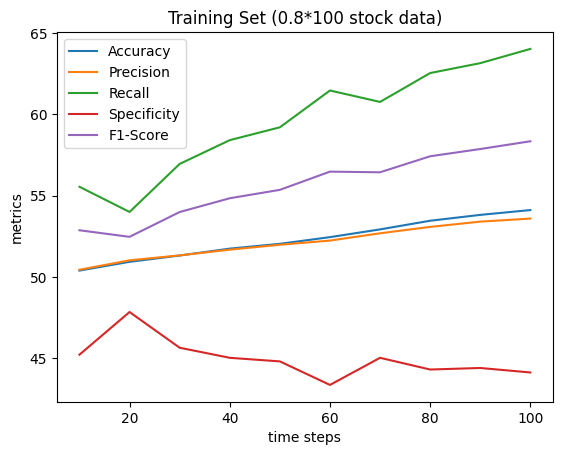

In [9]:
num_stocks=100
valid_split = 0.2
# train metrics plot
import matplotlib.pyplot as plt
x = train_metrics_dict.keys()
y = train_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Training Set ({1-valid_split}*{num_stocks} stock data)')
plt.show()

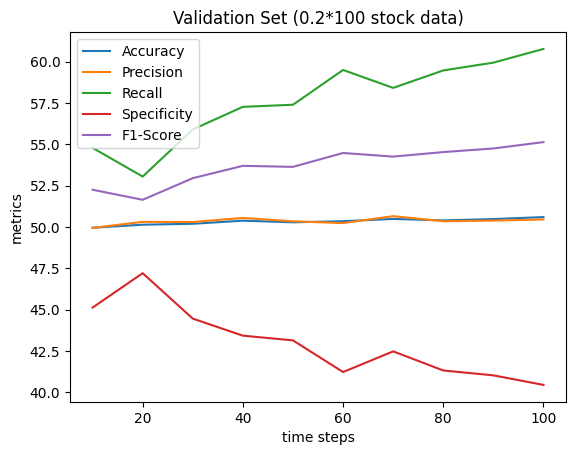

In [10]:
# valid metrics plot
import matplotlib.pyplot as plt
x = valid_metrics_dict.keys()
y = valid_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Validation Set ({valid_split}*{num_stocks} stock data)')
plt.show()

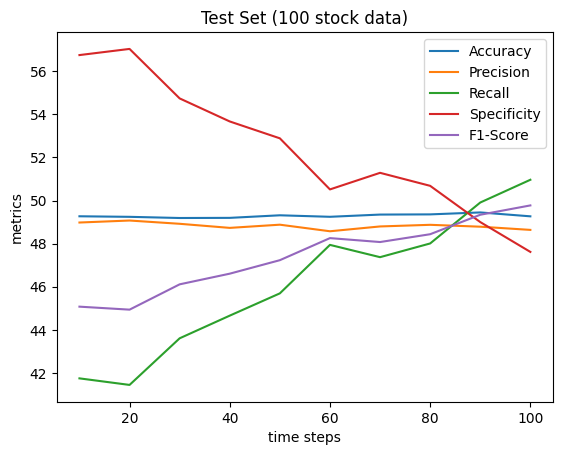

In [11]:
# test metrics plot
import matplotlib.pyplot as plt
x = test_metrics_dict.keys()
y = test_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Test Set ({num_stocks} stock data)')
plt.show()